### This notebook is identical to ```skab_experiments_1.ipynb```, please read it first, as there are additional explanations and remarks. 

This experiment differs only in latent_dim being set to 30 and training for 20k epochs.

This setting of the model so that it has a higher learning capacity lead to more stable MSE anomaly scores in most of the moments, both for train and test dataset.

The "probabilistic" reconstruction probability managed to at least recognize some time windows in the test dataset as not anomalous, but did not show any improvement that would change my mind about defaulting to using MSE.

In [2]:
from typing import Optional, Iterable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from detector import SCVAEDetector

In [3]:
def load_skab_no_anomalies():
    df = pd.read_csv(f'../datasets/skab/anomaly-free/anomaly-free.csv',sep=';').drop(columns=['datetime'])  
    id_cols = ['id_1']    
    return df, None

In [4]:
data,ids = load_skab_no_anomalies()

In [5]:
split_point = int(len(data)*0.75)
train_data = data.iloc[:split_point,:].copy()
test_data = data.iloc[split_point:,:].copy()

## MSE anomaly score

In [6]:
scvae = SCVAEDetector(latent_dim=30,time_window=8,batch_size=64,id_columns=ids)
scvae._init_empty_model(data)
scvae._model.load_weights("20kepochs_skab_train")
train_res = scvae.predict_anomaly_scores(train_data[:400])
test_res = scvae.predict_anomaly_scores(test_data[:400])

### Train data

(-3.0, 3.0)

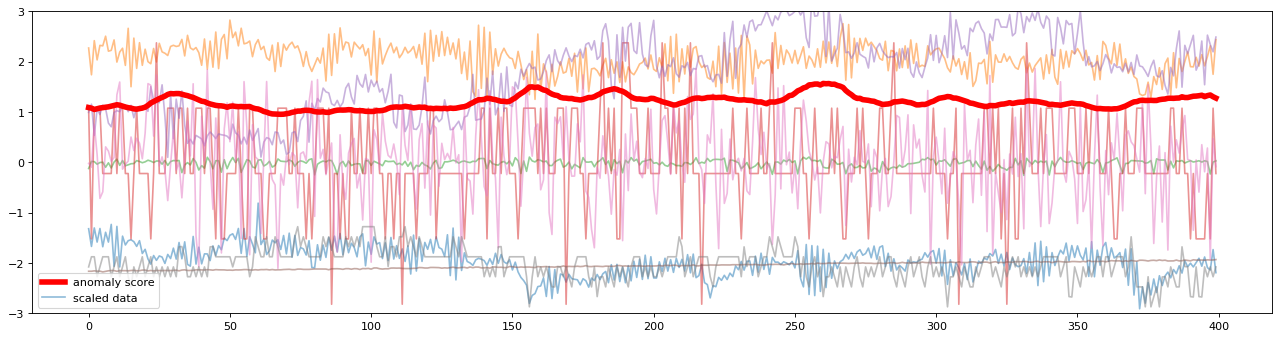

In [7]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(scvae._scaler.transform(train_data[:400]), alpha=0.5, label='scaled data')
plt.plot(np.array(train_res[:400]), lw=5, c='red', label='anomaly score')
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels)
plt.ylim(-3,3)

## Test data

(-3.0, 3.0)

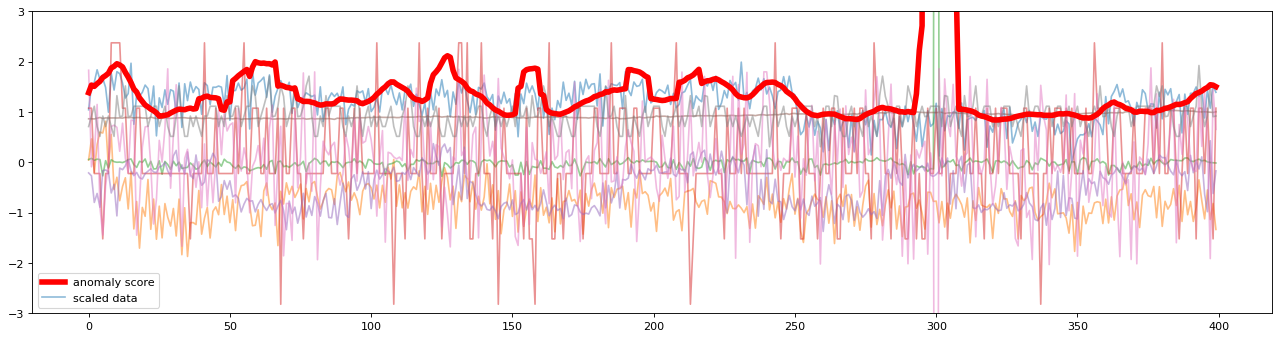

In [8]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(scvae._scaler.transform(test_data[:400]), alpha=0.5, label='scaled data')
plt.plot(np.array(test_res[:400]), lw=5, c='red', label='anomaly score')
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels)
plt.ylim(-3,3)

## Probability anomaly score

In [10]:
scvae = SCVAEDetector(latent_dim=30,time_window=8,batch_size=64, use_probability_reconstruction=True)
scvae._init_empty_model(data)
scvae._model.load_weights("20kepochs_skab_train")
# probability takes way too long to calculate compared to MSE
train_res = scvae.predict_anomaly_scores(train_data[:400])
test_res = scvae.predict_anomaly_scores(test_data[:400])

(-3.0, 3.0)

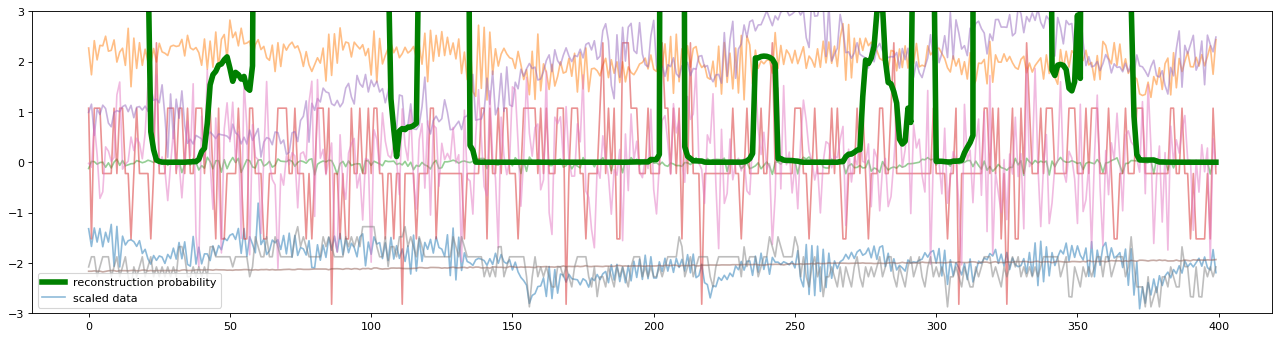

In [11]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(scvae._scaler.transform(train_data[:400]), alpha=0.5, label='scaled data')
plt.plot(np.array(train_res[:400]), lw=5, c='green', label='reconstruction probability')
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels)
plt.ylim(-3,3)

(-3.0, 3.0)

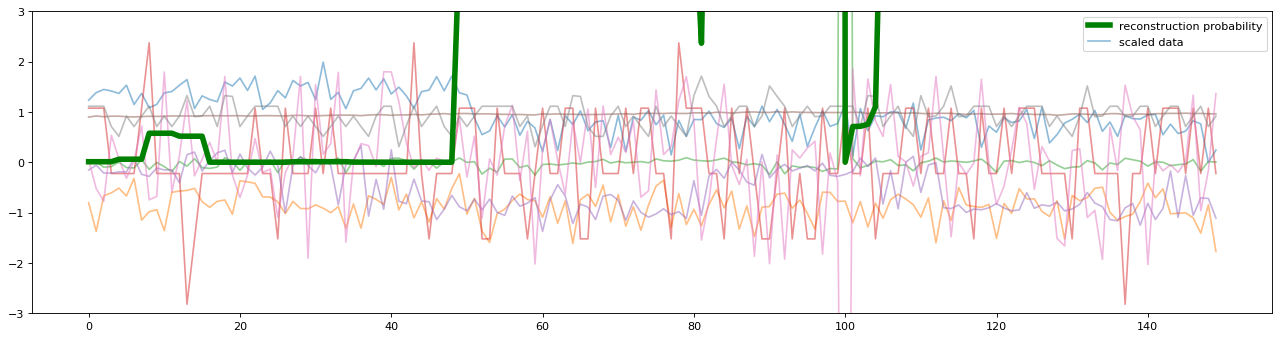

In [12]:
plt.figure(figsize=(20, 5), dpi=80)
plt.plot(scvae._scaler.transform(test_data[200:350]), alpha=0.5, label='scaled data')
plt.plot(np.array(test_res[200:350]), lw=5, c='green', label='reconstruction probability')
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels)
plt.ylim(-3,3)